# Photo search 📸

Мы работаем в фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”).

Пользователи размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т.д. Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.

Наш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Сервис выводит несколько фотографий с такой же или похожей сценой.

Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Нам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно выбрать лучшую модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу. На основе лучшей модели можно будет собрать предварительную версию продукта, которую вы покажете руководителю компании.

**Юридические ограничения**

В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.

В нашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

`This image is unavailable in your country in compliance with local laws.`

Однако у нас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.

**Содержание**<a id='toc0_'></a>    
1. [Подготовка   ](#toc1_)    
1.1. [Библиотеки   ](#toc1_1_)    
1.2. [Константы   ](#toc1_2_)    
1.3. [Служебные функции   ](#toc1_3_)    
2. [Датасет `train_dataset.csv`  ](#toc2_)    
2.1. [Загрузка  ](#toc2_1_)    
2.2. [Проверка типов данных  ](#toc2_2_)    
2.3. [Проверка полных дубликатов  ](#toc2_3_)    
2.4. [Проверка пропусков  ](#toc2_4_)    
3. [Датасет `test_images.csv` ](#toc3_)    
3.1. [Загрузка ](#toc3_1_)    
3.2. [Проверка типов данных ](#toc3_2_)    
3.3. [Проверка полных дубликатов ](#toc3_3_)    
3.4. [Проверка пропусков ](#toc3_4_)    
4. [Датасет `test_queries.csv`](#toc4_)    
4.1. [Загрузка](#toc4_1_)    
4.2. [Проверка типов данных](#toc4_2_)    
4.3. [Проверка полных дубликатов](#toc4_3_)    
4.4. [Проверка пропусков](#toc4_4_)    
5. [Датасет `ExpertAnnotations.tsv`](#toc5_)    
5.1. [Загрузка](#toc5_1_)    
5.2. [Проверка типов данных](#toc5_2_)    
5.3. [Проверка полных дубликатов](#toc5_3_)    
5.4. [Проверка пропусков](#toc5_4_)    
5.5. [Изучение признаков](#toc5_5_)    
5.6. [Выводы по датасету](#toc5_6_)    
6. [Датасет `CrowdAnnotations.tsv`](#toc6_)    
6.1. [Загрузка](#toc6_1_)    
6.2. [Проверка типов данных](#toc6_2_)    
6.3. [Проверка полных дубликатов](#toc6_3_)    
6.4. [Проверка пропусков](#toc6_4_)    
6.5. [Изучение признаков](#toc6_5_)    
6.6. [Выводы по датасету](#toc6_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>Подготовка    [&#8593;](#toc0_)

### 1.1. <a id='toc1_1_'></a>Библиотеки    [&#8593;](#toc0_)

In [1]:
from IPython.display import clear_output

In [2]:
%pip install -q accelerate==0.26.0
%pip install -q catboost==1.2.7
%pip install -q dill==0.3.8
%pip install -q hyperopt==0.2.7
%pip install -q lightgbm==4.5.0
%pip install -q matplotlib==3.8.4
%pip install -q numpy==1.26.4
%pip install -q optree==0.14.0
%pip install -q pandas==2.2.3
%pip install -q prettytable==3.12.0
%pip install -q scikit-learn==1.5.2
%pip install -q spacy==3.8.4
%pip install -q termcolor==2.5.0
%pip install -q torch==2.6.0
%pip install -q torchmetrics==1.7.0
%pip install -q torchvision==0.21.0
%pip install -q tqdm==4.66.5
%pip install -q transformers==4.49.0

clear_output()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from termcolor import colored
from prettytable import PrettyTable

### 1.2. <a id='toc1_2_'></a>Константы    [&#8593;](#toc0_)

In [4]:
RANDOM_STATE = 27

### 1.3. <a id='toc1_3_'></a>Служебные функции    [&#8593;](#toc0_)

In [5]:
def check_duplicates(df: pd.DataFrame) -> None:
    duplicates_count = df.duplicated().sum()

    if duplicates_count == 0:
        print(colored('Полных дубликатов не обнаружено.', 'green'))
        return

    duplicates_part = duplicates_count / len(df)
    print(colored(f'Обнаружено {duplicates_count} дубликатов ({duplicates_part:.2%})', 'red'))

In [6]:
def check_nans(df: pd.DataFrame) -> None:
    if df.isna().sum().sum() == 0:
        print(colored('Пропусков не обнаружено.', 'green'))
        return

    table = PrettyTable()
    table.field_names = ['Feature', 'Missing values count']

    missing_info = df.isna().sum().sort_values()
    cols = missing_info.index.to_list()
    for col in cols:
        count = missing_info[col]
        color = 'green' if count == 0 else 'red'
        s = f'{count} ({count / len(df):.2%})'
        table.add_row([col, colored(s, color)])

    print(table)

In [7]:
def create_histogram(
    data: pd.Series,
    bins: int,
    title: str,
    x_label: str
) -> None:

    # Создание гистограммы
    counts, _, patches = plt.hist(data, bins=bins, edgecolor='black', color='skyblue')

    # Добавление значений сверху каждого столбца
    for i in range(len(counts)):
        plt.text(
            patches[i].get_x() + patches[i].get_width() / 2,  # Центр столбца по оси X
            counts[i] + max(counts) * 0.02,  # Немного выше верхней границы столбца
            str(int(counts[i])),  # Значение (количество)
            ha='center',  # Выравнивание по центру
            fontsize=10
        )

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Количество", fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()


## 2. <a id='toc2_'></a>Датасет `train_dataset.csv`   [&#8593;](#toc0_)

### Описание

В файле `train_dataset.csv` собрана информация, необходимая для обучения:
- имя файла изображения
- идентификатор описания
- текст описания.

Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

### 2.1. <a id='toc2_1_'></a>Загрузка   [&#8593;](#toc0_)

In [8]:
train_dataset = pd.read_csv('./data/train_dataset.csv')
train_dataset.head()

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


### 2.2. <a id='toc2_2_'></a>Проверка типов данных   [&#8593;](#toc0_)

In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


### 2.3. <a id='toc2_3_'></a>Проверка полных дубликатов   [&#8593;](#toc0_)

In [10]:
check_duplicates(train_dataset)

Полных дубликатов не обнаружено.


### 2.4. <a id='toc2_4_'></a>Проверка пропусков   [&#8593;](#toc0_)

In [11]:
check_nans(train_dataset)

Пропусков не обнаружено.


## 3. <a id='toc3_'></a>Датасет `test_images.csv`  [&#8593;](#toc0_)

### Описание

В папке `test_images` содержатся изображения для тестирования модели и данный датасет содержит имена файлов для тестирования.

### 3.1. <a id='toc3_1_'></a>Загрузка  [&#8593;](#toc0_)

In [12]:
test_images = pd.read_csv('./data/test_images.csv')
test_images.head()

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


### 3.2. <a id='toc3_2_'></a>Проверка типов данных  [&#8593;](#toc0_)

In [13]:
test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


### 3.3. <a id='toc3_3_'></a>Проверка полных дубликатов  [&#8593;](#toc0_)

In [14]:
check_duplicates(test_images)

Полных дубликатов не обнаружено.


### 3.4. <a id='toc3_4_'></a>Проверка пропусков  [&#8593;](#toc0_)

In [15]:
check_nans(test_images)

Пропусков не обнаружено.


## 4. <a id='toc4_'></a>Датасет `test_queries.csv` [&#8593;](#toc0_)

### Описание

В файле `test_queries.csv` находится информация, необходимая для тестирования:
- идентификатор запроса,
- текст запроса
- релевантное изображение.

Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

### 4.1. <a id='toc4_1_'></a>Загрузка [&#8593;](#toc0_)

In [16]:
test_queries = pd.read_csv('./data/test_queries.csv', sep='|', index_col=0)
test_queries.head()

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


### 4.2. <a id='toc4_2_'></a>Проверка типов данных [&#8593;](#toc0_)

In [17]:
test_queries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


### 4.3. <a id='toc4_3_'></a>Проверка полных дубликатов [&#8593;](#toc0_)

In [18]:
check_duplicates(test_queries)

Полных дубликатов не обнаружено.


### 4.4. <a id='toc4_4_'></a>Проверка пропусков [&#8593;](#toc0_)

In [19]:
check_nans(test_queries)

Пропусков не обнаружено.


## 5. <a id='toc5_'></a>Датасет `ExpertAnnotations.tsv` [&#8593;](#toc0_)

### Описание

В файле ExpertAnnotations.tsv содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1 - Имя файла изображения.\
2 - Идентификатор описания.\
3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от `1` до `4`, где:\
`1` — изображение и запрос совершенно не соответствуют друг другу\
`2` — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует\
`3` — запрос и текст соответствуют с точностью до некоторых деталей\
`4` — запрос и текст соответствуют полностью

### 5.1. <a id='toc5_1_'></a>Загрузка [&#8593;](#toc0_)

In [20]:
expert_annotations = pd.read_csv('./data/ExpertAnnotations.tsv', sep='\t', header=None, names=['image', 'query_id', 'annot_1', 'annot_2', 'annot_3'])
expert_annotations.head()

,image,query_id,annot_1,annot_2,annot_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


### 5.2. <a id='toc5_2_'></a>Проверка типов данных [&#8593;](#toc0_)

In [21]:
expert_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   annot_1   5822 non-null   int64 
 3   annot_2   5822 non-null   int64 
 4   annot_3   5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


### 5.3. <a id='toc5_3_'></a>Проверка полных дубликатов [&#8593;](#toc0_)

In [22]:
check_duplicates(expert_annotations)

Полных дубликатов не обнаружено.


### 5.4. <a id='toc5_4_'></a>Проверка пропусков [&#8593;](#toc0_)

In [23]:
check_nans(expert_annotations)

Пропусков не обнаружено.


### 5.5. <a id='toc5_5_'></a>Изучение признаков [&#8593;](#toc0_)

#### Признак `annot_1`

In [24]:
expert_annotations['annot_1'].describe()

count    5822.000000
mean        1.436620
std         0.787084
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: annot_1, dtype: float64

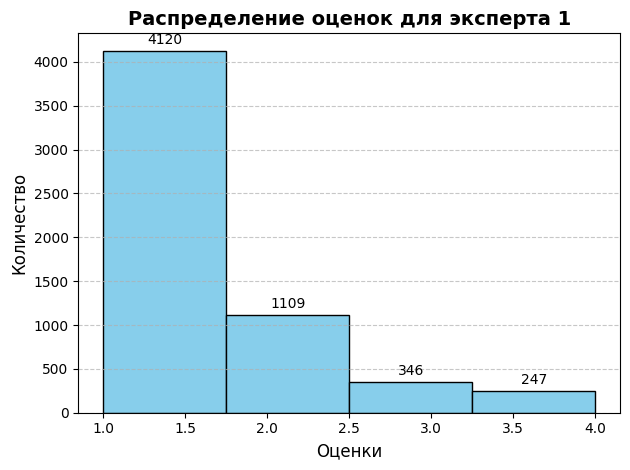

In [25]:
create_histogram(expert_annotations['annot_1'], 4, 'Распределение оценок для эксперта 1', 'Оценки')

#### Признак `annot_2`

In [26]:
expert_annotations['annot_2'].describe()

count    5822.000000
mean        1.624356
std         0.856222
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: annot_2, dtype: float64

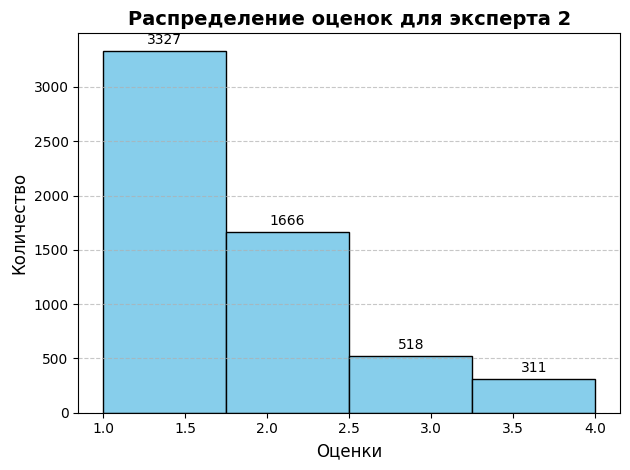

In [27]:
create_histogram(expert_annotations['annot_2'], 4, 'Распределение оценок для эксперта 2', 'Оценки')

#### Признак `annot_3`

In [28]:
expert_annotations['annot_3'].describe()

count    5822.000000
mean        1.881999
std         0.904087
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: annot_3, dtype: float64

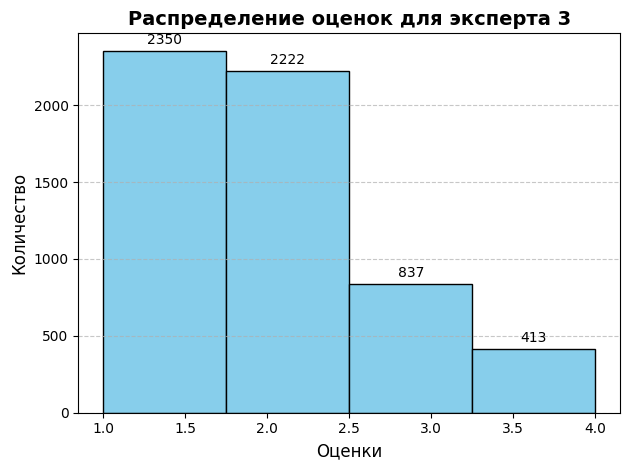

In [29]:
create_histogram(expert_annotations['annot_3'], 4, 'Распределение оценок для эксперта 3', 'Оценки')

### 5.6. <a id='toc5_6_'></a>Выводы по датасету [&#8593;](#toc0_)

Видно, что эксперты 1 и 2 поставили оценку `1` (полное несоответствие) для бОльшей части изображений-запросов. Эксперт 3 примерно одинаково ставил оценки `1` и `2` (`2350` и `2222` соответственно). Оценки `3` и `4` ставились куда реже всеми тремя экспертами. Можно предположить, что данные для обучения не очень качественные и разработать *Proof of Concept* будет непросто.

Для дальнейшей работы сагрегируем данные:
- Если для одного изображения все оценки среди экспертов различны - усредним их.
- Если же есть равные оценки - применим голосование большинством.

In [30]:
def agg_expert_annot(row: pd.Series):
    a, b, c = row
    if len(set([a, b, c])) == 3:  # все оценки различны - усредняем
        return (a + b + c) / 3
    else:  # голосуем большинством
        return max([a, b, c], key=lambda x: [a, b, c].count(x))

In [31]:
expert_annotations['agg_expert_annot'] = expert_annotations[['annot_1', 'annot_2', 'annot_3']].apply(agg_expert_annot, axis=1)
expert_annotations = expert_annotations.drop(columns=['annot_1', 'annot_2', 'annot_3'])
expert_annotations.head()

,image,query_id,agg_expert_annot
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,2.0
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.0


## 6. <a id='toc6_'></a>Датасет `CrowdAnnotations.tsv` [&#8593;](#toc0_)

### Описание

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1) Имя файла изображения.
2) Идентификатор описания.
3) Доля людей, подтвердивших, что описание соответствует изображению.
4) Количество человек, подтвердивших, что описание соответствует изображению.
5) Количество человек, подтвердивших, что описание не соответствует изображению.

### 6.1. <a id='toc6_1_'></a>Загрузка [&#8593;](#toc0_)

In [32]:
crowd_annotations = pd.read_csv('./data/CrowdAnnotations.tsv', sep='\t', header=None, names=['image', 'query_id', 'pos_part', 'pos_count', 'neg_count'])
crowd_annotations.head()

,image,query_id,pos_part,pos_count,neg_count
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


### 6.2. <a id='toc6_2_'></a>Проверка типов данных [&#8593;](#toc0_)

In [33]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   image      47830 non-null  object 
 1   query_id   47830 non-null  object 
 2   pos_part   47830 non-null  float64
 3   pos_count  47830 non-null  int64  
 4   neg_count  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


### 6.3. <a id='toc6_3_'></a>Проверка полных дубликатов [&#8593;](#toc0_)

In [34]:
check_duplicates(crowd_annotations)

Полных дубликатов не обнаружено.


### 6.4. <a id='toc6_4_'></a>Проверка пропусков [&#8593;](#toc0_)

In [35]:
check_nans(crowd_annotations)

Пропусков не обнаружено.


### 6.5. <a id='toc6_5_'></a>Изучение признаков [&#8593;](#toc0_)

#### Признак `pos_part`

In [36]:
crowd_annotations['pos_part'].describe()

count    47830.000000
mean         0.068786
std          0.207532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pos_part, dtype: float64

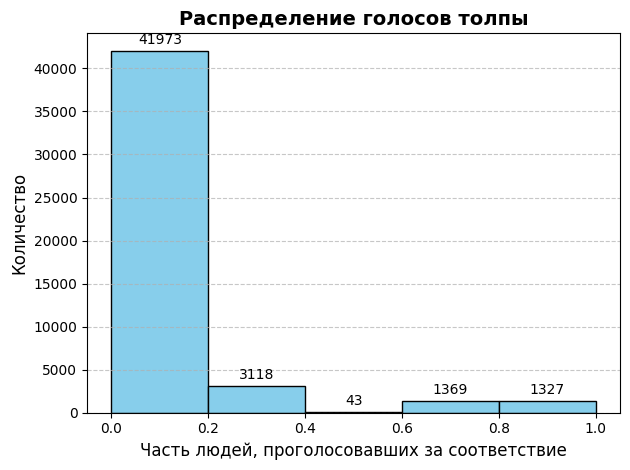

In [37]:
create_histogram(crowd_annotations['pos_part'], 5, 'Распределение голосов толпы', 'Часть людей, проголосовавших за соответствие')

### 6.6. <a id='toc6_6_'></a>Выводы по датасету [&#8593;](#toc0_)

В данном датасете наблюдается такая же картинка, что и в датасете с голосами экспертов. Подавляющее большинство голосует за то, что описание полностью не соответствует изображению.

Приведет оценки к формату как у экспертов - значение будет лежать в диапазоне `[1; 4]`. Для этого воспользуемся следующей формулой:\
$agg\_crowd\_annot = 1 + 3 * pos\_part$

Таким образом, оценки толпы теперь находятся в том же диапазоне, что и оценки экспертов:
- Если все голоса за "соответствует", то `pos_part = 1`, и оценка будет равна `4`.
- Если все голоса за "не соответствует", то `pos_part = 0`, и оценка будет равна `1`.

In [38]:
def agg_expert_annot(p: float) -> float:
    return 1 + 3 * p

In [39]:
crowd_annotations['agg_crowd_annot'] = crowd_annotations['pos_part'].apply(agg_expert_annot)
crowd_annotations['agg_crowd_annot'].describe()

count    47830.000000
mean         1.206357
std          0.622595
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: agg_crowd_annot, dtype: float64

In [40]:
crowd_annotations = crowd_annotations.drop(columns=['pos_part', 'pos_count', 'neg_count'])
crowd_annotations.head()

,image,query_id,agg_crowd_annot
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,4.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,1.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,1.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,1.0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,1.0


## Объединение оценок

In [41]:
expert_annotations.head()

,image,query_id,agg_expert_annot
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,2.0
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.0


In [42]:
crowd_annotations.head()

,image,query_id,agg_crowd_annot
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,4.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,1.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,1.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,1.0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,1.0


In [43]:
expert_annotations_index = set(expert_annotations['image'] + expert_annotations['query_id'])
crowd_annotations_index = set(crowd_annotations['image'] + crowd_annotations['query_id'])

print(f'Общие оценки: {len(expert_annotations_index & crowd_annotations_index)}')
print(f'Только экспертная оценка: {len(expert_annotations_index - crowd_annotations_index)}')
print(f'Только оценка толпы: {len(crowd_annotations_index - expert_annotations_index)}')

Общие оценки: 2329
Только экспертная оценка: 3493
Только оценка толпы: 45501


Как мы видим, встречаются самые разные ситуации. Поэтому объединим все записи, а далее будем агрериговать оценку исходя из ситуации.

In [44]:
annotations = pd.merge(expert_annotations, crowd_annotations, how='outer', on=['image', 'query_id'])
annotations.head()

,image,query_id,agg_expert_annot,agg_crowd_annot
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,NaN,4.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,NaN,1.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,NaN,1.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,NaN,1.0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,NaN,1.0


In [45]:
annotations['final_annot'] = np.nan  # просто заглушка

Если есть оценка только от экспертов - она и будет финальной оценкой.

In [46]:
mask = (annotations['agg_expert_annot'].notna()) & (annotations['agg_crowd_annot'].isna())
annotations.loc[mask, 'final_annot'] = annotations.loc[mask, 'agg_expert_annot']

Аналогично для оценки толпы.

In [47]:
mask = (annotations['agg_expert_annot'].isna()) & (annotations['agg_crowd_annot'].notna())
annotations.loc[mask, 'final_annot'] = annotations.loc[mask, 'agg_crowd_annot']

Если есть и те и те оценки - возьмем взвешенное среднее.

In [48]:
mask = (annotations['agg_expert_annot'].notna()) & (annotations['agg_crowd_annot'].notna())
annotations.loc[mask, 'final_annot'] = annotations.loc[mask, 'agg_crowd_annot'] * 0.4 + annotations.loc[mask, 'agg_expert_annot'] * 0.6

Проверим, что оценка есть для всех записей.

In [49]:
annotations['final_annot'].isna().sum()

0

In [50]:
annotations['final_annot'].describe()

count    51323.000000
mean         1.225148
std          0.621797
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: final_annot, dtype: float64

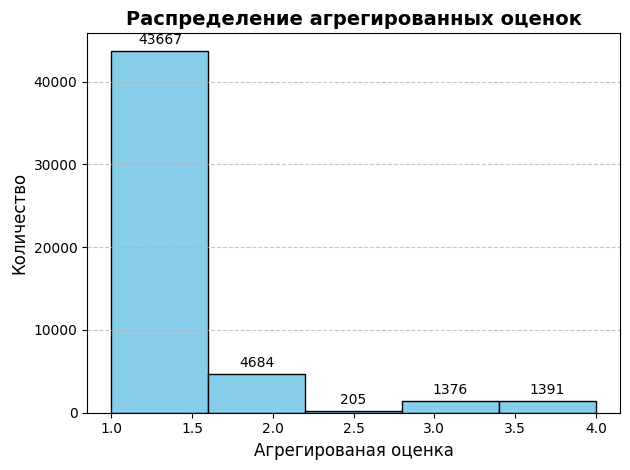

In [51]:
create_histogram(annotations['final_annot'], 5, 'Распределение агрегированных оценок', 'Агрегированая оценка')

Значения также находятся в диапазоне `[1; 4]`. Распределение сохранилось. Следовательно объединение проведено правильно.

In [52]:
annotations.head()

,image,query_id,agg_expert_annot,agg_crowd_annot,final_annot
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,NaN,4.0,4.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,NaN,1.0,1.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,NaN,1.0,1.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,NaN,1.0,1.0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,NaN,1.0,1.0


In [53]:
annotations = annotations.drop(columns=['agg_expert_annot', 'agg_crowd_annot'])

In [54]:
annotations.head()

,image,query_id,final_annot
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,4.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,1.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,1.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,1.0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,1.0


In [55]:
del crowd_annotations
del expert_annotations

## Датасет для обучения (train)

In [56]:
train_dataset.head(1)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [57]:
annotations.head(1)

,image,query_id,final_annot
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,4.0


In [58]:
train_dataset = pd.merge(train_dataset, annotations, how='left', on=['image', 'query_id'])
train_dataset.head()

,image,query_id,query_text,final_annot
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.6
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4.0
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0


In [61]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        5822 non-null   object 
 1   query_id     5822 non-null   object 
 2   query_text   5822 non-null   object 
 3   final_annot  5822 non-null   float64
dtypes: float64(1), object(3)
memory usage: 182.1+ KB


In [59]:
check_duplicates(train_dataset)

Полных дубликатов не обнаружено.


In [60]:
check_nans(train_dataset)

Пропусков не обнаружено.
